# Import Package

In [1]:
# openCV
import cv2 as cv

# basic
import numpy as np
import matplotlib.pyplot as plt

# Image Transformation with Tone Curve

In [2]:
def tone_curve(lookup_table, img):
    # copy image and flatten 1-D vector
    output = np.copy(img).reshape(-1)
    # transformation tone
    for i in range(len(output)-1):
        # transformate tone with lookup the table
        output[i] = lookup_table[output[i]]*255
    return output.reshape(img.shape)

# Creating 1-D interpolation Tone Curve and Tuning

In [4]:
if __name__ == '__main__':
    '''
    # varaibles:
    # xp: x-axis data points
    # fp: y-axis data points
    '''
    print('Please enter the x direction of the tone adjustment curve (input) control point coordinates')
    xp = [ float(input('x%s:' % str(i))) for i in range(4)] # [0, 0.3, 0.7, 1] #
    print('Please enter the y direction of the tone adjustment curve (output) control point coordinates')
    fp = [ float(input('y%s:' % str(i))) for i in range(4) ] # [0, 0.1, 0.9, 1]
    
    # interpolation
    lookup_table = np.interp([np.arange(0, 256)/255], xp, fp).reshape(-1)
    
    img = cv.imread('ntust_gray.jpg', cv.IMREAD_GRAYSCALE)
    tune_img = tone_curve(lookup_table, img)

Please enter the x direction of the tone adjustment curve (input) control point coordinates


x0: 0
x1: 0.3
x2: 0.7
x3: 1


Please enter the y direction of the tone adjustment curve (output) control point coordinates


y0: 0
y1: 0.1
y2: 0.9
y3: 1


# Show Image

True

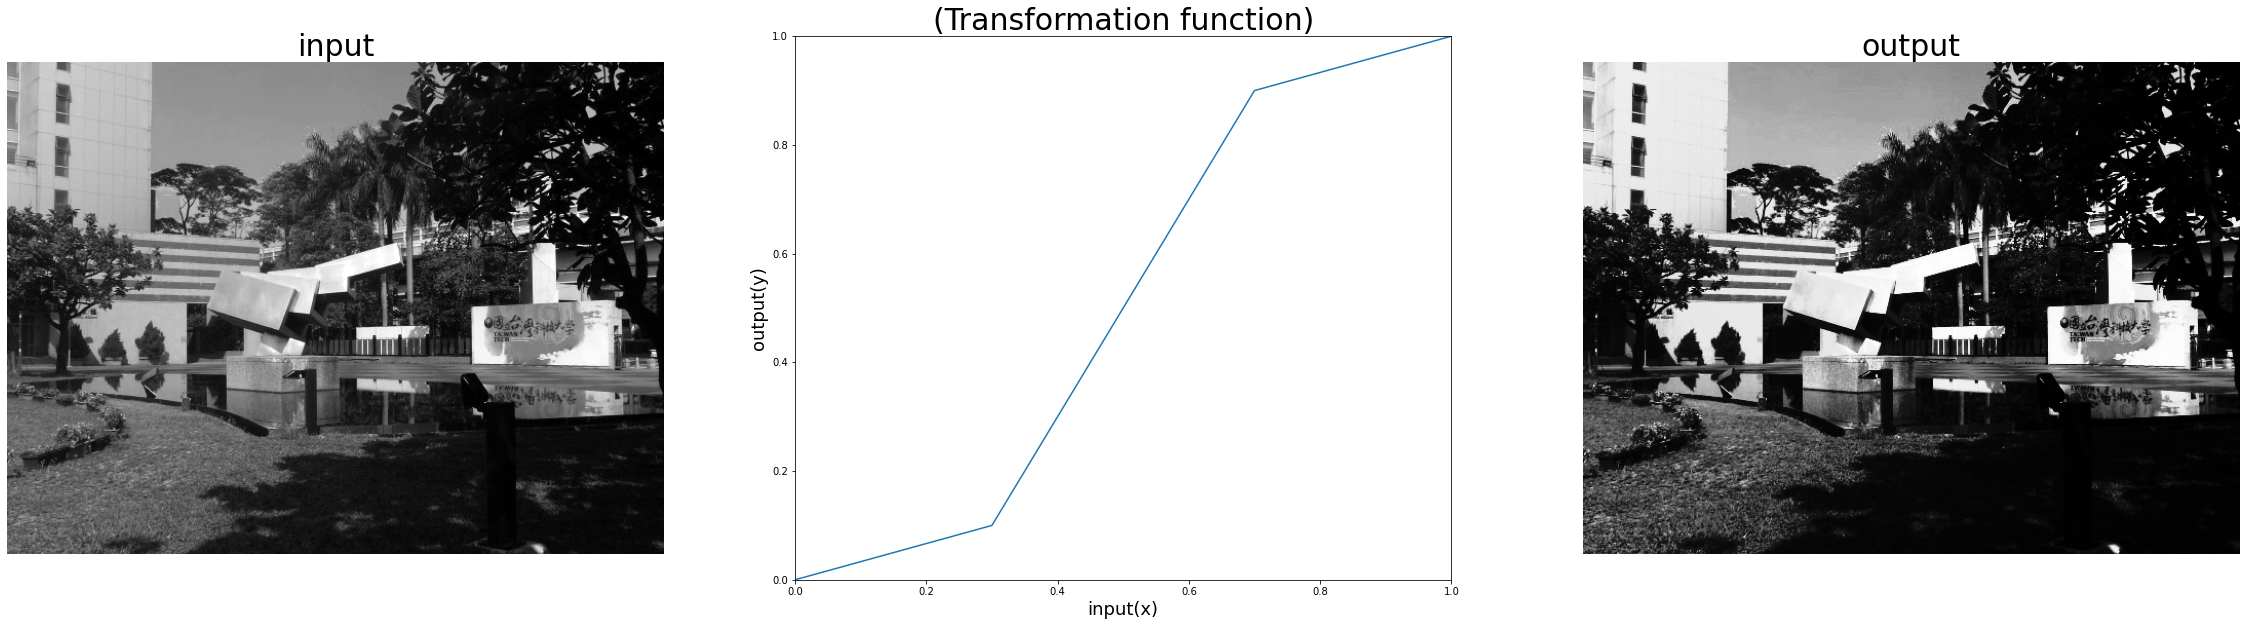

In [5]:
    plt.figure(figsize=(40, 10))
    
    ''' input '''
    plt.subplot(1,3,1)
    plt.title('input', fontsize=30)
    plt.imshow(img, plt.cm.gray)
    plt.axis('off')
    
    ''' Transformation function '''
    plt.subplot(1,3,2)
    plt.title('(Transformation function)', fontsize=30)
    plt.plot(xp, fp) 
    
    plt.xlabel("input(x)", fontsize=18)
    plt.ylabel("output(y)", fontsize=18)
    # x-axis and y-axis scale
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    # x-axis and y-axis min and max
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    ''' output '''
    plt.subplot(1,3,3)
    plt.title('output', fontsize=30)
    plt.imshow(tune_img, plt.cm.gray)
    plt.axis('off')
    
    # plt.show()
    plt.savefig('tone_curve.jpg')
    cv.imwrite('tone_curve_image.jpg', tune_img)